# Delay Scan -  DESC fringes on ExitScreen

In [1]:
import h5py;
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Image

DAQ run with delay scan

/asap3/fs-flash-o/gpfs/camp/2019/data/11007673/raw/hdf/by-run/FLASH1_USER1-run28496.h5
Delay Scan: 32 steps ?


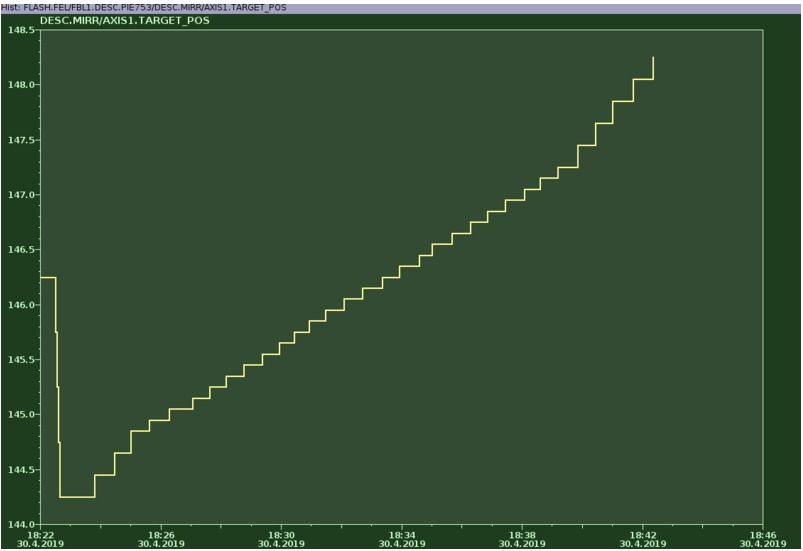

In [11]:
runNumber = 28496

dataDir = '/asap3/fs-flash-o/gpfs/camp/2019/data/11007673/raw/hdf/by-run/'
hdfFilename = 'FLASH1_USER1-run'+str(runNumber)+'.h5'
imagePath = '/asap3/flash/gpfs/bl1/2017/data/11003895/processed/notebooks/fig/'

print(dataDir+hdfFilename)
print('Delay Scan: 32 steps ?')
Image("delaymotor_history.jpeg")

### Read Images from h5 file 

In [3]:
hdfFile = h5py.File(dataDir+hdfFilename,'r')
img = hdfFile['/uncategorised/FLASH1_USER1/FLASH.FEL/FBL1.CAM/EXIT_SCREEN/dset'].value
print(type(img),'|',img.shape)

<class 'numpy.ndarray'> | (13200, 1280, 960)


/software/anaconda3/5.2/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


### Define ROI

In [33]:
ROI_x1, ROI_y1 = 200, 100
ROI_x2, ROI_y2 = 700, 700

### Calc Integral of ROI for all Images

In [37]:
integral = np.asarray([np.sum(img[index][ROI_x1:ROI_x2,ROI_y1:ROI_y2]) for index in range(0,img.shape[0])])
logicMap = (integral>25000)

(0, 1000)

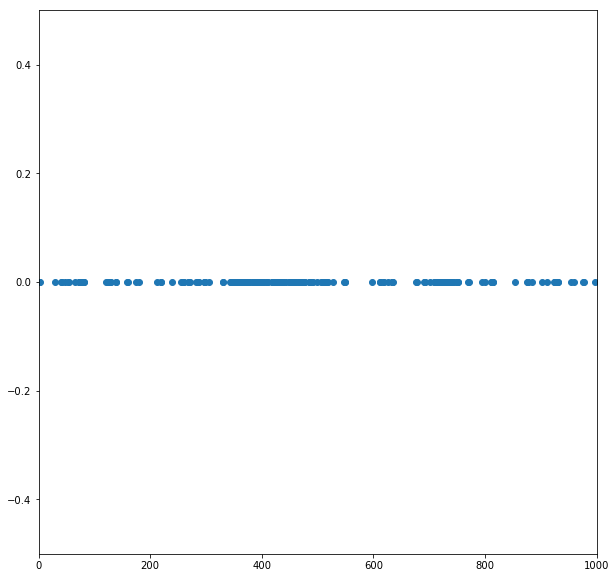

In [40]:
plt.figure(figsize=(10,10))
plt.plot(integral,'o')
plt.ylim(-0.5,0.5)
plt.xlim(0,1000)

In [39]:
res = [i for i, val in enumerate(logicMap) if val]
print('Number of blanks in the end:', len(logicMap)-res[-1])
print('Acutal Rate in dataset (without appended blanks): % .3f '%(len(res)/res[-1]))

Number of blanks in the end: 833
Acutal Rate in dataset (without appended blanks):  0.729 
